Student Details

### Name:  Garret Molloy

### ID:        9021906

All necessary imports are provided. Please do not add further imports.

In [228]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

Below is the exact same data you used for the regression in E-tivity 3, but this time you know exactly what function generated the data

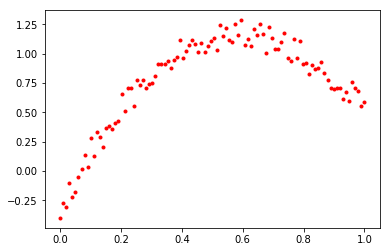

In [231]:
def target(X):
    #return: 0.5X^5-0.5X^3-4.25X^2+5.125X-0.4375
    return 0.5*((X-.5)-10*(X-.5)**2-(X-.5)**3+X**5)+1

points = 100
X = np.linspace(0, 1, points) # 100 values between 0 and 100
noise=np.random.random(points)/4
y_nf = target(X) #noise free target
y = y_nf+noise #noisy target

plt.plot(X,y,'r.')
plt.show()

Below is an implementation of linear regression with regularization

In [232]:
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [233]:
def lin_reg(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [234]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = lin_reg(w,X)
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(X))

To create higher order features:

In [235]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    ones = np.ones((X.shape[0],1))
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((ones, X.reshape(len(X),1),np.array(extra)),1)

## Task 4.1
Find the optimum regularization parameter, lambda &lambda;

In [236]:
def create_lambdas():
    return np.linspace(0.001, 1, 1000)

Iterate over lambda, train the model and calculate Eout. Plot the latter versus lambda to see how much regularization is required.

In [237]:
ein=[]
eout=[]
weights=[]
lambdas =  create_lambdas()
X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state=5, shuffle=True)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)


D:\Python\Miniconda\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [238]:
# Find the Best Lambda (where Eout is the smallest)
min_eout_index =  eout.index(min(eout))
print("Lamba with least Eout =", lambdas[min_eout_index])

Lamba with least Eout = 0.001


## Task 4.2
1. Plot Eout Versus Lambda &lambda;

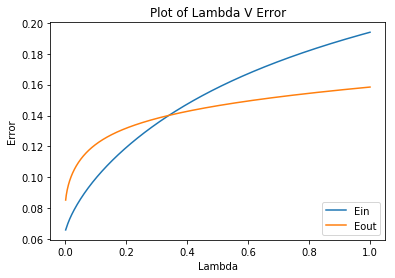

In [239]:
plt.plot(lambdas, ein, label="Ein")
plt.plot(lambdas, eout, label="Eout")
# plt.xlim([0.05, 1])
# plt.ylim([0.05, 1])
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.title('Plot of Lambda V Error')
plt.legend(loc="lower right")
plt.show()

Plotting the Ein and Eout against the Lamba __&lambda;__.

We see Ein getting worse as we add lambda noise, even though we have all the data the noise introduced increases the error as we increase the noise.

However Eout increases as we add noise as it does not overfit (it can't because of the noise) and can better match unseen data.

I am not seeing Eout get any better with regularization. 

In fact the smallest Lambda is the best?

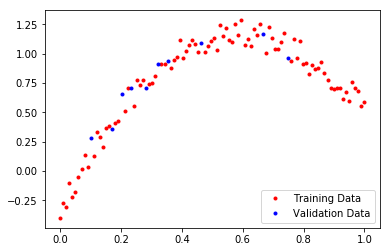

In [240]:
plt.plot(X_train[:,1],y_train,'r.', label="Training Data")
plt.plot(X_test[:,1],y_test,'b.', label="Validation Data")
plt.legend(loc="lower right")
plt.show()

In [241]:
def plot_predictions(X, y, w, l=0):
    predictions=(lin_reg(w, X))

    # To be able to plot the Curve I ned to sort on X[1] (X[0] is the bias) 
    # I concatenate the list, sort on X[1] and split again
    X, predictions, y = (list(t) for t in zip(*sorted(zip(X, predictions, y), key=lambda x: x[0][1])))
    X = np.array(X) # so I can slice
    plt.plot(X[:,1], predictions, 'bo-', label="Predicted")
    plt.plot(X[:,1], y,'ro-', label="Actual")
    plt.title("Actial v Predicted using Lambda=%0.3f" % l)
    plt.legend(loc="lower right")
    plt.show()

2. Just right Model (Lambda where we have the smallest Eout)

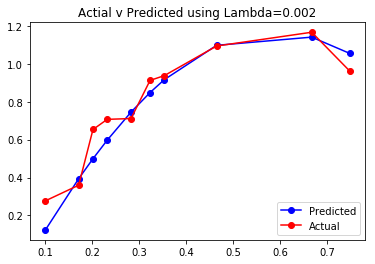

In [242]:
plot_predictions(X_test, y_test, weights[1], lambdas[1])

2. Under fitted model, where lambda is not helping and we have a larger Eout

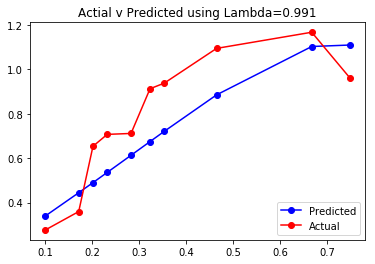

In [243]:
plot_predictions(X_test, y_test, weights[990], lambdas[990])

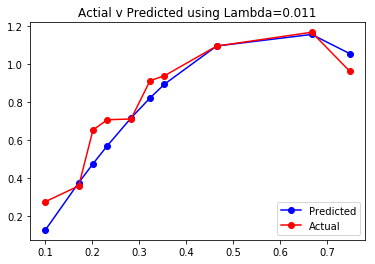

In [244]:
plot_predictions(X_test, y_test, weights[10], lambdas[10])

## Task 5
Use the code from Task 4 and perform the same analysis using 10-fold cross-validation. Use Scikitlearn’s KFOLD for this and think carefully about the parameters you use in KFOLD. Note that the data set provided is ordered by increasing X.

In [245]:
# I am going to do KFOLD on the Training Data only, as I do not want to use Test Data 

# Train Test Split already shuffled the Data, regards less I have added Shuffle = True in KFOLD

In [246]:
ein=[]
ein_average=np.zeros(1000)
eout=[]
eout_average=np.zeros(1000)
weights=[]
lambdas =  create_lambdas()
    
kf = KFold(n_splits=10,shuffle=True, random_state=5)

for train_index, test_index in kf.split(X_train, y_train):
    for i, l in enumerate(lambdas):    
        w = weights_reg(X_train[train_index],y_train[train_index],l)
        ein_average[i] += (calc_error(w,X_train[train_index],y_train[train_index])/1000)
        eout_average[i] += (calc_error(w,X_train[test_index],y_train[test_index])/1000)
        ein.append(calc_error(w,X_train[train_index],y_train[train_index]))
        eout.append(calc_error(w,X_train[test_index],y_train[test_index]))
        weights.append(w)


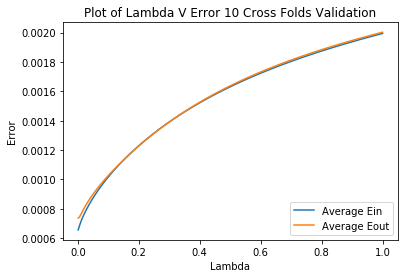

In [247]:
plt.plot(lambdas, ein_average, label="Average Ein")
plt.plot(lambdas, eout_average, label="Average Eout")
# plt.xlim([0.05, 1])
# plt.ylim([0.05, 1])
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.title('Plot of Lambda V Error 10 Cross Folds Validation')
plt.legend(loc="lower right")
plt.show()

Again I don't see a dropping graph for Lambda, only increasing error.

Much tighter Graph between Ein and Eout, because we are using the same data afgtergoing through all 10 folds. 

The real test is to see f we had Eout imporvement with the unused Test Data.

In [251]:
# Find the Best Lambda (where Eout is the smallest)
min_eout_index =  eout.index(min(eout))
print("Lamba with least Eout =", lambdas[min_eout_index%1000])

Lamba with least Eout = 0.061


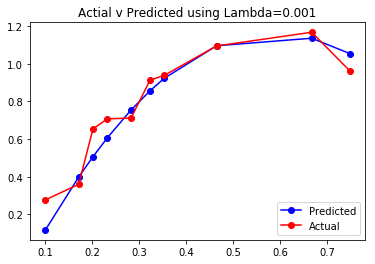

In [249]:
plot_predictions(X_test, y_test, weights[0], lambdas[0])

## Task 6
Use scikit-learn’s RidgeCV and LassoCV to obtain optimum &lambda; using the same transformed data (i.e. features up to 50th order).
- Observe the resulting Eout, and &lambda; compare these to previous results. What do you see? Is this what you expected?
- Compare the weights obtained with RidgeCV to those obtained with LassoCV. What do you see? Is this what you expected?


In [ ]:
LassoCV

In [ ]:
RidgeCV